# Random Number Generator

## Question 6.1 (0-9 Random Number Generator)

### Probability Distribution Function (Histogram)

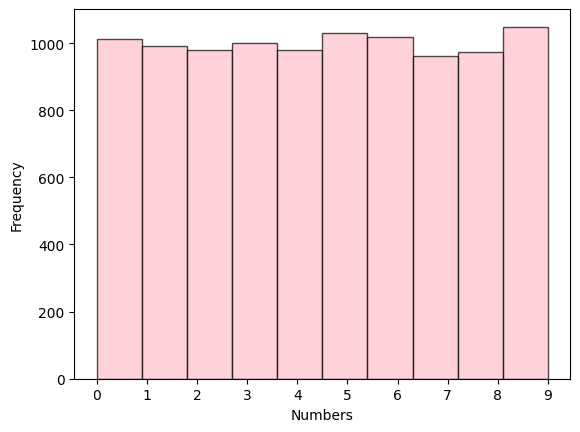

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#generating ranom number between 0 to 9 for N times
N=10000 #the number of random numbers that it'll be created
number=10 #numbers between 0 to 9
listnum=[]
for i in range(N):
    randnum=np.random.randint(0,number)
    listnum.append(randnum)


#histogram
plt.hist(listnum, bins=10, facecolor="pink", edgecolor='black', alpha=0.7) #bins= x values interval /listnum= y values 
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.xticks(range(number))
plt.show()

### Plotting 1/√N based on N

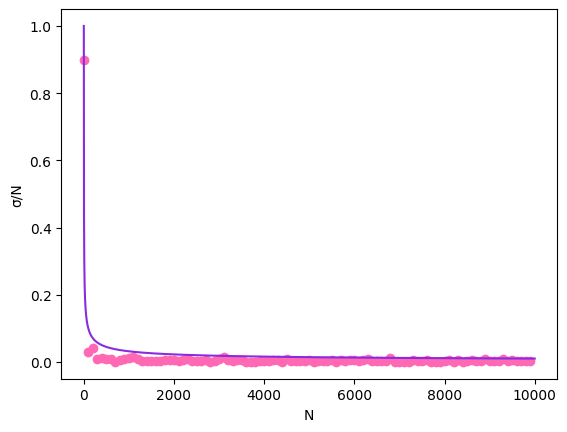

In [3]:
#in this section we will show how accurate the generator is, we want to know how the generator behave compared to the ideal way(in ideal the frequency of each number should be N/10)
import numpy as np
import math
import matplotlib.pyplot as plt

number=10
listnum=[]
N=10000

# for findong the σ : average of frequency is N/10 SO σ = (one of the height - N/10)
sigmalist=[]
for j in range (1,N,100): #I want the procces of the random number generating to happen for every N possible from 1 to 10,000 so we will know in which case our generator is closer to the ideal way(N/10)  #to reduce the runtime i will get one in every 100 numbers (N=j)
    listnum=[]
    for i in range(j):
        randnum=np.random.randint(0,number)
        listnum.append(randnum)
    counts, bins = np.histogram(listnum, bins=10, range=(0, 10)) #counts= height of the columns in histogram
    sigma = abs(counts[0] - j/10) # [0] was choosen randomly (it does'nt matter what i choose)
    #plotting the behavior of our generator N based of the N/10
    plt.scatter(j,sigma/j, color="hotpink")

#fitting the 1/sqrt(x) curve to it
x=np.linspace(1,10000,10000)
y=1/np.sqrt(x)
plt.plot(x,y,color='blueviolet')
plt.xlabel('N')
plt.ylabel('σ/N')
plt.show()
#so as plotted we can see that by making more random numbers(increasing N) the relative deviation of the root of my generator's frequency to the ideal's frequency (N/10) will goes to 0 

## Question 6.2 (Question 6.1 but generating only those with a 4 before them)

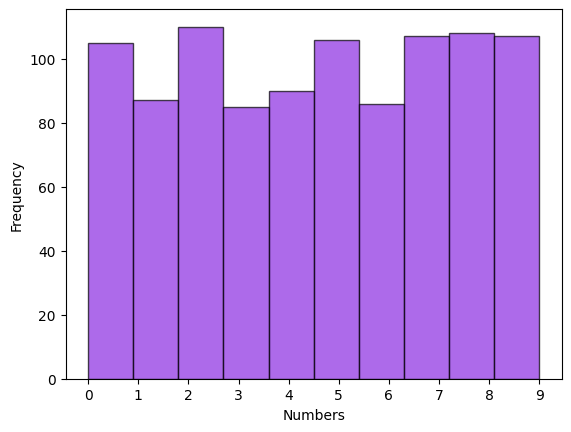

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#generating ranom number between 0 to 9 for N times
N=10000 #the number of random numbers that it'll be created
number=10 #numbers between 0 to 9
listnum=[]
for i in range(N):
    randnum=np.random.randint(0,number)
    listnum.append(randnum)

#seperating the numbers after 4 in another list 
after4num=[]
for j in range(len(listnum)):
    if listnum[j]==4:
        after4num.append(listnum[j+1])

#histogram
plt.hist(after4num, bins=10, facecolor="blueviolet", edgecolor='black', alpha=0.7) #bins= x values interval /counts= y values 
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.xticks(range(number))
plt.show()

## Question 6.3 (Linear Congruential Generator (LCG))

### Generating Random Numbers

In [73]:
#LCG formula:𝑥_𝑛+1=(𝑎 𝑥_𝑛 +𝑐) 𝑚ode m

a = 1664525
c = 1013904223
m= 2**31
x=1 #=x0

N=100 # the number of random number that we wnaat to generate
xn=[1]
for i in range(N): 
    x=(a*x + c)% m 
    xn.append(x)
print(xn)

[1, 1015568748, 1586005467, 18219390, 879966917, 217083232, 1587069247, 1180097938, 241328073, 70837908, 598057187, 1075679462, 1814098701, 389511432, 1447119047, 1009643386, 2065217681, 1549998268, 1403919595, 784272718, 135115861, 927463856, 448971087, 302988898, 1369582169, 557551588, 890116595, 355997366, 1629134493, 1129353048, 1077627607, 1849846346, 761386273, 1435167756, 2075506683, 1668959518, 206361061, 2001984000, 2123171167, 1610814258, 907991273, 1965935924, 2040076035, 665538694, 1598909997, 799570344, 702419175, 2113984794, 746870193, 395629404, 1597003531, 1420083438, 82416501, 1937313360, 991464815, 1423924226, 111242105, 1648664196, 200775699, 1484013142, 563241405, 1329870840, 1751816951, 632699882, 476658241, 1263914668, 1861155355, 47933630, 131922181, 2136774304, 1304844671, 1955666130, 1681056265, 737477588, 1998232867, 1003479078, 2097314125, 1785252424, 627173639, 1726976698, 1060733649, 585293308, 335716651, 167462030, 224395925, 1810068208, 272066959, 1917143

### 6.1 with LCG method

[1, 8, 7, 0, 7, 2, 7, 8, 3, 8, 7, 2, 1, 2, 7, 6, 1, 8, 5, 8, 1, 6, 7, 8, 9, 8, 5, 6, 3, 8, 7, 6, 3, 6, 3, 8, 1, 0, 7, 8, 3, 4, 5, 4, 7, 4, 5, 4, 3, 4, 1, 8, 1, 0, 5, 6, 5, 6, 9, 2, 5, 0, 1, 2, 1, 8, 5, 0, 1, 4, 1, 0, 5, 8, 7, 8, 5, 4, 9, 8, 9, 8, 1, 0, 5, 8, 9, 8, 7, 2, 5, 8, 9, 0, 1, 0, 3, 8, 1, 4, 5, 4, 1, 6, 3, 4, 1, 6, 7, 0, 9, 6, 1, 6, 1, 0, 5, 2, 5, 4, 7, 8, 1, 6, 7, 4, 7, 6, 9, 0, 1, 2, 3, 6, 1, 8, 1, 2, 5, 2, 7, 0, 5, 0, 9, 2, 1, 8, 3, 2, 3, 8, 5, 6, 3, 2, 1, 6, 5, 6, 1, 8, 5, 4, 5, 8, 3, 8, 5, 8, 9, 4, 7, 4, 5, 8, 5, 0, 5, 4, 1, 0, 7, 4, 3, 2, 7, 4, 5, 4, 5, 0, 3, 8, 9, 8, 1, 2, 7, 6, 1, 4, 1, 0, 1, 0, 5, 0, 7, 8, 5, 0, 5, 8, 5, 6, 3, 8, 7, 0, 3, 6, 3, 4, 9, 6, 1, 4, 7, 6, 3, 2, 1, 0, 5, 2, 1, 8, 3, 4, 7, 0, 1, 0, 1, 8, 1, 6, 3, 0, 7, 8, 1, 6, 3, 0, 9, 8, 7, 8, 3, 0, 3, 8, 5, 2, 1, 6, 9, 0, 3, 0, 3, 2, 1, 4, 5, 2, 9, 8, 5, 2, 1, 4, 1, 6, 3, 8, 9, 8, 1, 4, 9, 4, 3, 0, 3, 2, 9, 2, 9, 2, 9, 2, 5, 0, 1, 4, 1, 4, 9, 0, 1, 0, 7, 6, 9, 2, 5, 0, 7, 4, 9, 2, 1, 8, 1, 2, 3, 0, 7, 8, 1, 

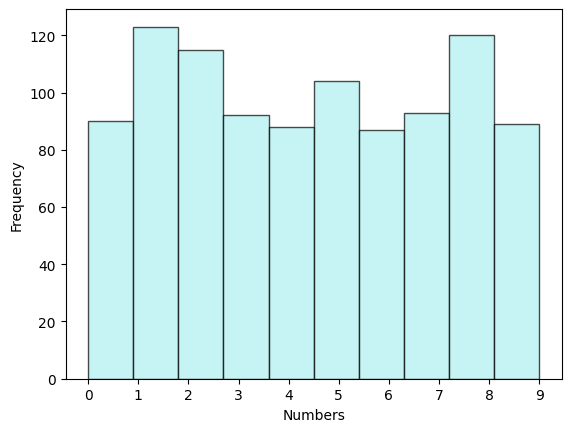

In [21]:
import numpy as np
import matplotlib.pyplot as plt

a = 1664525
c = 1013904223
m= 2**31
x=1 

N=1000 
xn=[1]
for i in range(N): 
    x=(a*x + c)% m 
    xn.append(x%10) #%10 is for creating numbers between 0 to 9 (the rightest unit)
print(xn)

#histogram
number=10 #x intervals
plt.hist(xn, bins=10, facecolor="paleturquoise", edgecolor='black', alpha=0.7) #bins= x values interval /counts= y values 
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.xticks(range(number))
plt.show()

### 6.2 with LCG method

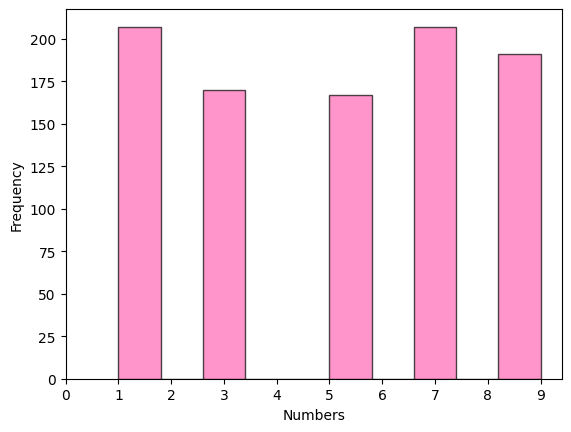

In [43]:
import numpy as np
import matplotlib.pyplot as plt

a = 1664525
c = 1013904223
m= 2**31
x=1 

N=10000 
xn=[1]
for i in range(N): 
    x=(a*x + c)% m 
    xn.append(x%10) #%10 is for creating numbers between 0 to 9 (the rightest unit)


#seperating the numbers after 4 in another list 
after4num=[]
for j in range(len(xn)):
    if xn[j]==4:
        after4num.append(xn[j+1])

#histogram
number=10 #x intervals
plt.hist(after4num, bins=10, facecolor="hotpink", edgecolor='black', alpha=0.7) #bins= x values interval /counts= y values 
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.xticks(range(number))
plt.show()

## Question 6.4 (Central Limit Theorem (CLT))

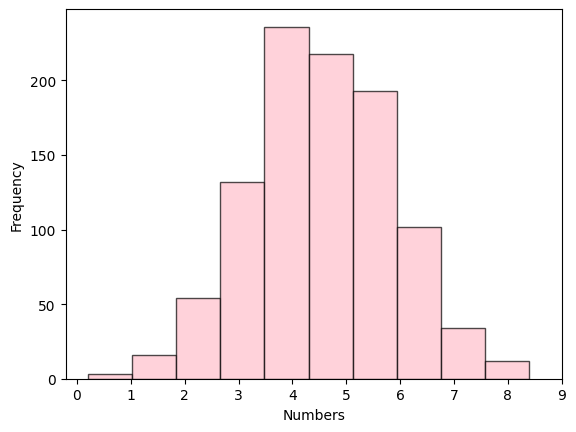

In [56]:
import numpy as np
import matplotlib.pyplot as plt

#generating ranom number between 0 to 9 for N times
N=1000 #the number of random numbers that it'll be created
m=5 #generating m random number for each N
number=10 #numbers between 0 to 9
listnum=[]
for i in range(N):
    randnum=np.random.randint(0,number,m) 
    listnum.append(randnum.mean()) #getting the mean of the 5 numbers for each numbers in N will make it gaussian


#histogram
plt.hist(listnum, bins=10, facecolor="pink", edgecolor='black', alpha=0.7) #bins= x values interval /counts= y values 
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.xticks(range(number))
plt.show()

## Question 6.5 (Generator with a Gaussian distribution)

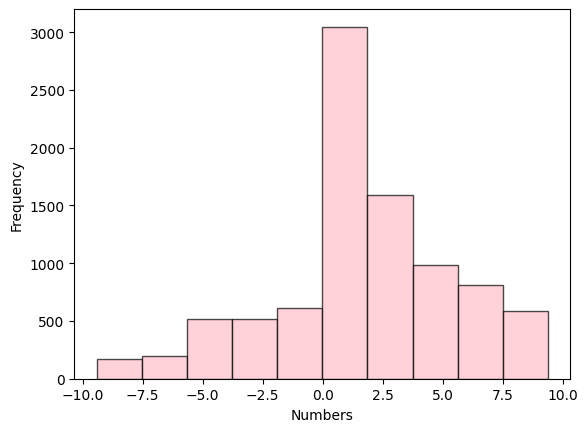

In [71]:
import numpy as np

N=10000 #the number of random numbers that it'll be created
number=10 #numbers between 0 to 9
sigma=number/2 #deviation of the number will be in the middle of it
y=[]
for i in range(int(N/2)): #we need N numbers so i will generate N/2 for each(x1 & x2)
    x=np.random.randint(0,number,2)
    x.sort() #i want the smaller one to be at the begging so it will be x1
    x1=x[0] #the first random number
    x2=x[1] #the second random number
    if x1==x2: #making sure x1 and x2 are not equall otherwise in y1 formula ln will be -1 
        continue
    # writing the y formulas
    y1=np.sqrt((-np.log(1-(x1/x2))*2*sigma**2)/(1+np.tan(x2**2)**2))
    y.append(y1)
    y2=y1*np.tan(x2**2)
    y.append(y2)

#histogram
plt.hist(y, bins=10, facecolor="pink", edgecolor='black', alpha=0.7) #bins= x values interval /listnum= y values 
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.show()